# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [159]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_star_fwd = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Add some calculations to the following code block:

In [205]:
# Loop over these delta phi = phi_anode - phi_elyte values:
n_elec = -2
beta = 0.5
T = 800 + 273 #K

# forward coefficients
nu_H_Ni_1 = 2
nu_H2O_Ni_1 = 0
nu_Vac_Ni_1 = 0
nu_Vac_elyte_1 = 0
nu_Ox_elyte_1 = 1

# reverse coefficients
nu_H_Ni_2 = 0
nu_H2O_Ni_2 = 1
nu_Vac_Ni_2 = 1
nu_Vac_elyte_2 = 1
nu_Ox_elyte_2 = 0

# total coefficients
nu_H_Ni = nu_H_Ni_2 - nu_H_Ni_1
nu_H2O_Ni = nu_H2O_Ni_2 - nu_H2O_Ni_1
nu_Vac_Ni = nu_Vac_Ni_2 - nu_Vac_Ni_1
nu_Vac_elyte = nu_Vac_elyte_2 - nu_Vac_elyte_1
nu_Ox_elyte = nu_Ox_elyte_2 - nu_Ox_elyte_1




C_Ox_elyte = X_Ox_elyte * C_elyte
C_H_Ni = X_H_Ni * C_Ni_s
C_Vac_elyte = X_Vac_elyte * C_elyte
C_H2O_Ni = X_H2O_Ni * C_Ni_s
C_Vac_Ni = X_Vac_Ni * C_Ni_s

g_o_rxn = g_Vac_Ni_o + g_Vac_elyte_o + g_H2O_Ni_o - (g_Ox_elyte_o + 2 * g_H_Ni_o)


prod_C_fwd = (C_Ox_elyte ** nu_Ox_elyte_1 * C_H_Ni ** nu_H_Ni_1)

prod_C_rev = (C_Vac_elyte ** nu_Vac_elyte_2 * C_H2O_Ni ** nu_H2O_Ni_2 * C_Vac_Ni ** nu_Vac_Ni_2) 


prod_C_o = (C_elyte ** nu_Vac_elyte_2 * C_Ni_s ** nu_Vac_Ni_2 * C_Ni_s ** nu_H2O_Ni_2) / (C_elyte ** nu_Ox_elyte_1 * C_Ni_s ** nu_H_Ni_1)

k_star_rev = k_star_fwd / (exp(-g_o_rxn / (R * T)) * (prod_C_o))

delta_phi = np.linspace(-0.9,0.05,100)
i_elementary = np.zeros_like(delta_phi)


for ind, E in enumerate(delta_phi):
    k_fwd = k_star_fwd * exp(-beta * n_elec * F * E / (R * T))
    k_rev = k_star_rev * exp((1-beta) *  n_elec * F * E / (R * T))

    i_elementary[ind] = n_elec * F * (k_fwd * prod_C_fwd - k_rev * prod_C_rev)
    
print(k_rev,prod_C_fwd)

236710.59309322113 1.0310189760000001e-14


Plot the results:

Text(0, 0.5, 'Current [A/m2]')

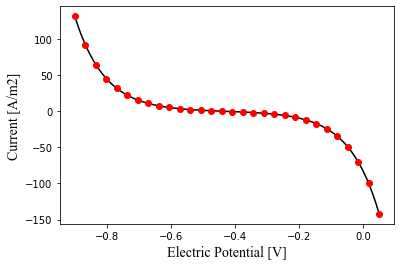

In [206]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

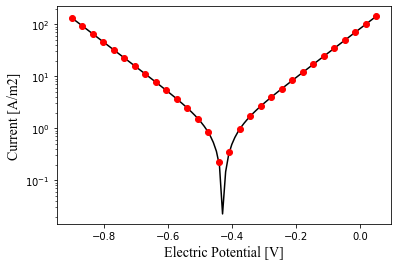

In [158]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:

The model plots almost exactly match the validation code (amazing). The shape of the plots makes sense as well. As you start from more negative potential and move left, the slope decreases until it is zero, around -0.52 V, and then begins to get steeper. A greater slope and greater change in current corresponds with a higher overpotential. This is also the point where the current switches from positive to negative This means that at -0.52 V the current switches direction from into the anode to into the electrolyte.

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [238]:
a_Ox_elyte = X_Ox_elyte
a_H_Ni = X_H_Ni
a_Vac_elyte = X_Vac_elyte
a_H2O_Ni = X_H2O_Ni 
a_Vac_Ni = X_Vac_Ni


g_rxn = g_o_rxn + R * T * log ((a_Vac_Ni * a_H2O_Ni ** nu_H2O_Ni_2 * a_Vac_elyte) / (a_Ox_elyte ** nu_Ox_elyte_1 * a_H_Ni ** nu_H_Ni_1))


prod_C_fwd_2 = (C_Ox_elyte ** ((1 - beta) * nu_Ox_elyte_1) * C_H_Ni ** ((1 - beta) * nu_H_Ni_1))

prod_C_rev_2 = (C_Vac_elyte ** (beta * nu_Vac_elyte_2) * C_H2O_Ni ** (beta * nu_H2O_Ni_2) * C_Vac_Ni ** (beta * nu_Vac_Ni_2)) 

                                                                                                                                                   
phi_eq = -g_rxn / (n_elec * F)

i_o = n_elec * F * k_star_fwd ** (1 - beta) * k_star_rev ** beta * prod_C_fwd_2 * prod_C_rev_2

i_BV = np.zeros_like(delta_phi)
eta =  np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
   
    
    eta[ind] = E - phi_eq
    
    i_BV[ind] = i_o * (exp(-beta * n_elec * F * eta[ind] / (R * T)) - exp((1-beta) * n_elec * F * eta[ind] / (R * T)))

print(eta)

[-0.47149168 -0.46189572 -0.45229976 -0.4427038  -0.43310784 -0.42351188
 -0.41391592 -0.40431996 -0.394724   -0.38512804 -0.37553208 -0.36593612
 -0.35634016 -0.3467442  -0.33714825 -0.32755229 -0.31795633 -0.30836037
 -0.29876441 -0.28916845 -0.27957249 -0.26997653 -0.26038057 -0.25078461
 -0.24118865 -0.23159269 -0.22199673 -0.21240077 -0.20280481 -0.19320885
 -0.18361289 -0.17401693 -0.16442097 -0.15482501 -0.14522905 -0.13563309
 -0.12603713 -0.11644117 -0.10684521 -0.09724926 -0.0876533  -0.07805734
 -0.06846138 -0.05886542 -0.04926946 -0.0396735  -0.03007754 -0.02048158
 -0.01088562 -0.00128966  0.0083063   0.01790226  0.02749822  0.03709418
  0.04669014  0.0562861   0.06588206  0.07547802  0.08507398  0.09466994
  0.1042659   0.11386186  0.12345782  0.13305378  0.14264973  0.15224569
  0.16184165  0.17143761  0.18103357  0.19062953  0.20022549  0.20982145
  0.21941741  0.22901337  0.23860933  0.24820529  0.25780125  0.26739721
  0.27699317  0.28658913  0.29618509  0.30578105  0

#### Let's plot the BV and Marcus currents together:

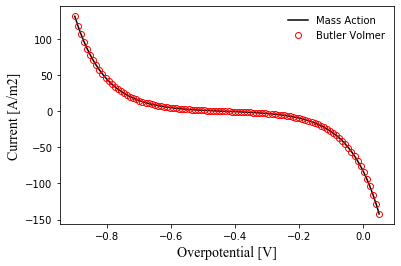

In [231]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

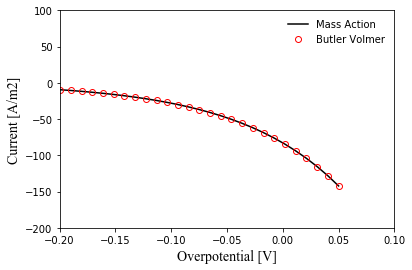

In [235]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.xlim((-.2,0.1))
plt.ylim((-200,100))
plt.show()

#### Discussion:

The plots once again match very closely. This makes sense, as we proved that Butler-Volmer and Mass-Action are mathematically the same, so the models should also be the same. Since $i_\circ$ in B-V contains all the kinetic information, we can assume $i_\circ$ remains constant as long as the kinetics remain constant. Some things that might affect the kinetic information are temperature, or if gases/solutions are non-ideal, which would affect the activites and concentrations.  

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [243]:
i_Tafel = np.zeros_like(delta_phi)
eta =  np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    
    eta[ind] = E - phi_eq
    i_Tafel[ind] = i_o * exp (beta * F * eta[ind] / (R * T))
    
print(i_Tafel)

[ -0.06284299  -0.06618999  -0.06971525  -0.07342827  -0.07733903
  -0.08145809  -0.08579652  -0.09036602  -0.09517889  -0.10024809
  -0.10558728  -0.11121082  -0.11713388  -0.1233724   -0.12994317
  -0.13686391  -0.14415324  -0.1518308   -0.15991727  -0.16843442
  -0.17740518  -0.18685373  -0.19680551  -0.20728731  -0.21832738
  -0.22995543  -0.24220279  -0.25510244  -0.26868912  -0.28299943
  -0.2980719   -0.31394712  -0.33066785  -0.34827913  -0.36682838
  -0.38636555  -0.40694327  -0.42861695  -0.45144496  -0.47548879
  -0.50081319  -0.52748636  -0.55558013  -0.58517016  -0.61633616
  -0.64916205  -0.68373623  -0.72015182  -0.7585069   -0.79890476
  -0.8414542   -0.88626981  -0.93347228  -0.98318875  -1.0355531
  -1.09070636  -1.14879706  -1.20998167  -1.27442494  -1.34230045
  -1.41379098  -1.48908908  -1.56839754  -1.65192994  -1.73991125
  -1.83257842  -1.93018102  -2.03298191  -2.14125794  -2.25530072
  -2.37541739  -2.50193144  -2.63518359  -2.7755327   -2.92335678
  -3.079053

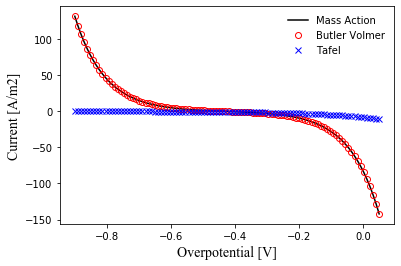

In [244]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Discussion: 

The Tafel plot is much closer to linear and to zero current at all points than Mass action/Butler-Volmer, although it does change slightly. The Tafel approximation is useful for when the overpotential $\eta$ is large. As shown in the plot below, Tafel most closely matches mass action and Bulter-Volmer between -0.5 V and -0.3 V, which is also very close to where the the current switches from positive to negative. Because this is the range the Tafel approximation is most accurate, this must also be the region where the overpotential is highest. Interestingly, the point where Tafel is equal to the other curves is more like -0.37 V, instead of -0.53 V, where I would expect a maximum over potential. This discrepancy may be due to the approximate nature of Tafel.

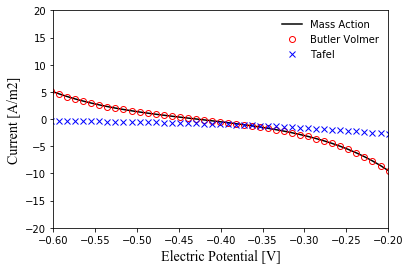

In [245]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-.6,-.2))
plt.ylim((-20,20))
plt.show()

#### Discussion:
